CLUSTERING by MUCHIRA JUNIOR
-----------------------------
KMeans clustering with sklearn
it clusters income and spending score of a population

In [1]:
#import the libraries
import pandas as pd
import numpy as np
import seaborn as sns

import sklearn.cluster as cluster

In [2]:
#load the data
df=pd.read_csv('Mall_Customers.csv')

In [3]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [7]:
#rename columns for easy reading
df.rename(columns={'Annual Income (k$)':'income','Spending Score (1-100)':'spendingscore'},inplace=True)

In [8]:
df

,CustomerID,Gender,Age,income,spendingscore
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [9]:
df.describe()

,CustomerID,Age,income,spendingscore
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


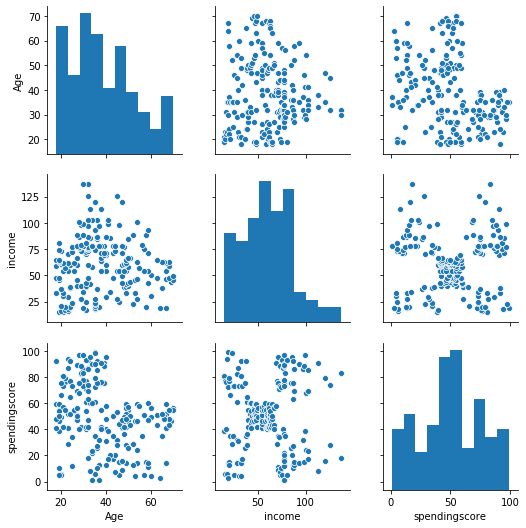

In [10]:
#lets plot Age income and spendingscore corelation
sns.pairplot(df[['Age','income','spendingscore']])

In [14]:
#lets cluster spending score and income data 
#we will use 5 clusters as visualized in the graph obove
kmeans=cluster.KMeans(n_clusters=5,init='k-means++')
kmeans=kmeans.fit(df[['spendingscore','income']])

In [16]:
#lets see the details of the cluster points
kmeans.cluster_centers_

array([[49.51851852, 55.2962963 ],
       [17.11428571, 88.2       ],
       [82.12820513, 86.53846154],
       [79.36363636, 25.72727273],
       [20.91304348, 26.30434783]])

In [18]:
#adding the labels column
df['clusters']=kmeans.labels_

In [19]:
df

,CustomerID,Gender,Age,income,spendingscore,clusters
0,1,Male,19,15,39,4
1,2,Male,21,15,81,3
2,3,Female,20,16,6,4
3,4,Female,23,16,77,3
4,5,Female,31,17,40,4
...,...,...,...,...,...,...
195,196,Female,35,120,79,2
196,197,Female,45,126,28,1
197,198,Male,32,126,74,2
198,199,Male,32,137,18,1


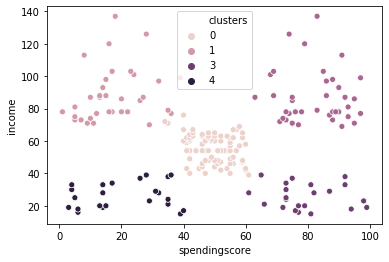

In [20]:
#plotting the clusters
sns.scatterplot(x='spendingscore', y='income', hue='clusters', data=df)